In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles
from scipy.interpolate import interp1d

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_csv("showcase_application/showwcase_sessions.csv")
df = df.dropna()

In [4]:
df.head(2)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0


In [5]:
df.shape

(299, 14)

In [6]:
df['session_id'][(df['comment_given'] == False) & (df['projects_added'] == False) & (df['likes_given'] == False)].count()

4

In [9]:
df['session_id'][(df['comment_given'] == True) | (df['projects_added'] == True) | (df['likes_given'] == True)].count()

295

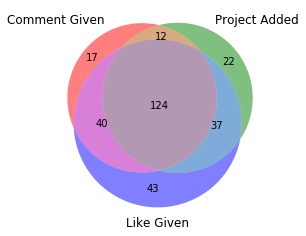

In [47]:
A = df['session_id'][(df['comment_given'] == True) & (df['projects_added'] == False) & (df['likes_given'] == False)].count()
B = df['session_id'][(df['comment_given'] == False) & (df['projects_added'] == True) & (df['likes_given'] == False)].count()
C = df['session_id'][(df['comment_given'] == False) & (df['projects_added'] == False) & (df['likes_given'] == True)].count()
AB = df['session_id'][(df['comment_given'] == True) & (df['projects_added'] == True) & (df['likes_given'] == False)].count()
BC = df['session_id'][(df['comment_given'] == True) & (df['projects_added'] == False) & (df['likes_given'] == True)].count()
CA = df['session_id'][(df['comment_given'] == False) & (df['projects_added'] == True) & (df['likes_given'] == True)].count()
ABC = df['session_id'][(df['comment_given'] == True) & (df['projects_added'] == True) & (df['likes_given'] == True)].count()

venn3(subsets = (A, B, C, AB, BC, CA, ABC), set_labels = ('Comment Given', 'Project Added', 'Like Given'), alpha = 0.5)

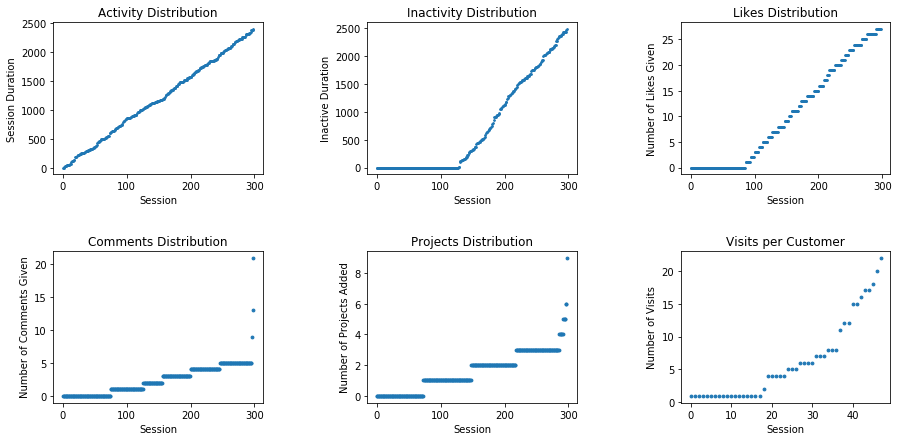

In [131]:
activity_df = df.sort_values(by = ['session_duration']).reset_index(drop=True)
inactivity_df = df.sort_values(by = ['inactive_duration']).reset_index(drop=True)
likes_df = df.sort_values(by = ['session_likes_given']).reset_index(drop=True)
comments_df = df.sort_values(by = ['session_comments_given']).reset_index(drop=True)
projects_df = df.sort_values(by = ['session_projects_added']).reset_index(drop=True)
customer_repeats_df = pd.DataFrame(df['customer_id'].value_counts(ascending=True)).reset_index(drop=True)

plt.figure(figsize=[15,7])
    
plt.subplot(2, 3, 1)

plt.scatter(activity_df.index, activity_df.session_duration, s=3)
plt.title('Activity Distribution')
plt.xlabel('Session')
plt.ylabel('Session Duration')

plt.subplot(2, 3, 2)

plt.scatter(inactivity_df.index, inactivity_df.inactive_duration, s=3)
plt.title('Inactivity Distribution')
plt.xlabel('Session')
plt.ylabel('Inactive Duration')

plt.subplot(2,3,3)

plt.scatter(likes_df.index, likes_df.session_likes_given, s=3)
plt.title('Likes Distribution')
plt.xlabel('Session')
plt.ylabel('Number of Likes Given')


plt.subplot(2,3,4)

plt.scatter(comments_df.index, comments_df.session_comments_given, s=8)
plt.title('Comments Distribution')
plt.xlabel('Session')
plt.ylabel('Number of Comments Given')

plt.subplot(2,3,5)

plt.scatter(projects_df.index, projects_df.session_projects_added, s=8)
plt.title('Projects Distribution')
plt.xlabel('Session')
plt.ylabel('Number of Projects Added')

plt.subplot(2,3,6)

plt.scatter(customer_repeats_df.index, customer_repeats_df.customer_id, s=8)
plt.title('Visits per Customer')
plt.xlabel('Session')
plt.ylabel('Number of Visits')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()



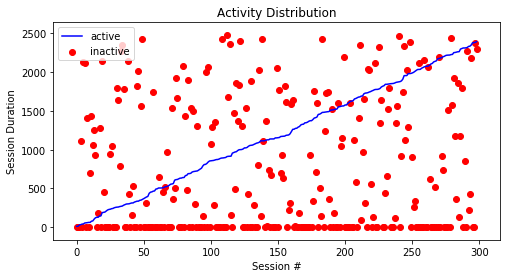

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(activity_df.index, activity_df.session_duration, color = "blue")
plt.scatter(activity_df.index, activity_df.inactive_duration, color='red')
plt.legend(['active', 'inactive'])
plt.plot()
plt.title('Activity Distribution')
plt.xlabel('Session #')
plt.ylabel('Session Duration')
plt.show()

In [11]:
corr = df.iloc[:,2:].corr()
corr

,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
session_projects_added,1.000000,-0.014775,-0.065215,0.001022,-0.038429,0.018398
session_likes_given,-0.014775,1.000000,0.048944,-0.076404,0.032711,-0.057032
session_comments_given,-0.065215,0.048944,1.000000,0.011550,-0.020312,0.010574
inactive_duration,0.001022,-0.076404,0.011550,1.000000,0.137024,0.073598
bugs_in_session,-0.038429,0.032711,-0.020312,0.137024,1.000000,-0.032970
session_duration,0.018398,-0.057032,0.010574,0.073598,-0.032970,1.000000


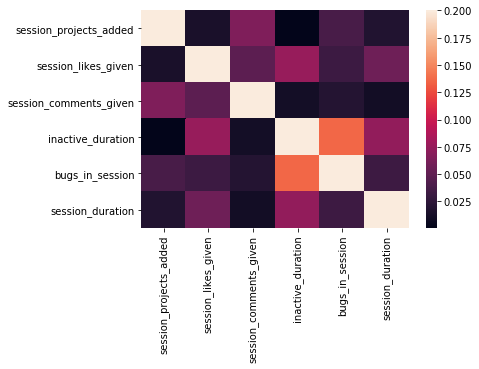

In [12]:
sns.heatmap(corr.abs(), vmax=0.2,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
df.session_projects_added.sum()

484.0

In [14]:
# df[df['session_projects_added'] != 0].count()
df['session_id'][df['session_projects_added'] != 0].count()

226

In [15]:
df.customer_id.nunique()

48

In [16]:
df['date'] = pd.DatetimeIndex(df.login_date).date
df.head()

# dtime_df = df.groupby(['date'], as_index=False)['customer_id'].count()

time_df = df.groupby(['date']).agg({
    'session_id': 'count',
    'comment_given': 'count',
    'likes_given': 'count', 
    'projects_added' : 'count',
    'session_projects_added': sum,
    'session_likes_given': sum,
    'session_comments_given': sum,
    'session_duration': sum})
time_df = time_df.apply(lambda x: x/x.max(), axis=0)
time_df.head()

,likes_given,session_id,session_likes_given,session_comments_given,comment_given,projects_added,session_projects_added,session_duration
date,,,,,,,,
2019-10-01,0.428571,0.428571,0.052632,0.102041,0.428571,0.428571,0.551724,0.455310
2019-10-02,0.238095,0.238095,0.080972,0.122449,0.238095,0.238095,0.413793,0.196570
2019-10-03,0.476190,0.476190,0.356275,0.367347,0.476190,0.476190,0.655172,0.462441
2019-10-04,0.428571,0.428571,0.522267,0.469388,0.428571,0.428571,0.275862,0.374890
2019-10-05,0.666667,0.666667,0.947368,0.469388,0.666667,0.666667,0.758621,0.570802


In [17]:
time_df.columns

Index(['likes_given', 'session_id', 'session_likes_given',
       'session_comments_given', 'comment_given', 'projects_added',
       'session_projects_added', 'session_duration'],
      dtype='object')

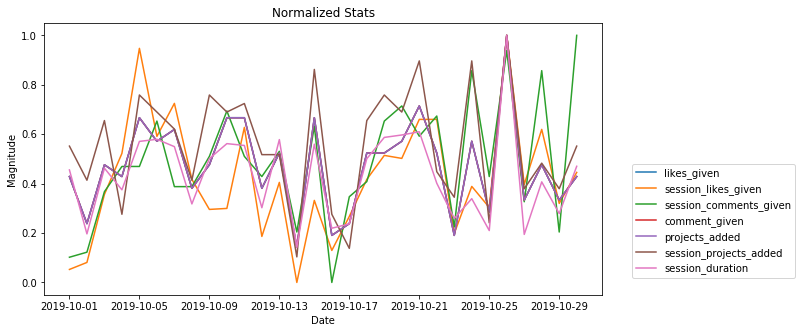

In [23]:
plt.figure(figsize=(10, 5))
list_2 = ['session_likes_given',
       'session_comments_given', 'session_projects_added', 'session_duration']
list_ = ['likes_given', 'session_likes_given',
       'session_comments_given', 'comment_given', 'projects_added',
       'session_projects_added', 'session_duration']
for i in  list_:
    plt.plot(time_df.index, time_df[i])
plt.legend(list_, loc=9, bbox_to_anchor=(1.2,0.5))
plt.title('Normalized Stats')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()

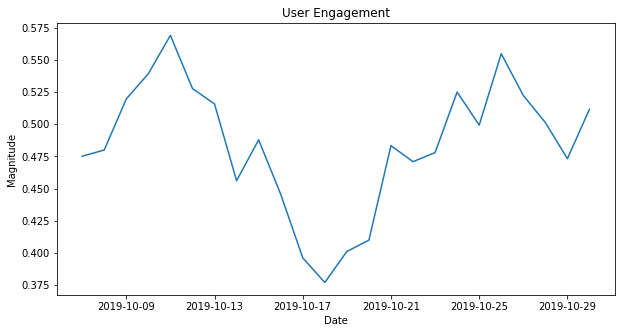

<Figure size 432x288 with 0 Axes>

In [34]:
time_df['engagement'] = time_df.mean(axis=1)
time_df['engagement'] = pd.Series(time_df['engagement']).rolling(7).mean()

plt.figure(figsize=(10, 5))
plt.plot(time_df.index, time_df['engagement'])
plt.title('User Engagement')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()
plt.savefig('User Engagement.pdf')